In [1]:
## Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")

In [3]:
## Since y and click denote the same 
df=df.drop("click",axis=1)

In [4]:
df.device_id.value_counts(normalize=True)


a99f214a    0.825798
c357dbff    0.000620
0f7c61dc    0.000510
afeffc18    0.000340
936e92fb    0.000270
              ...   
125e25bb    0.000010
244973fb    0.000010
9ba711d4    0.000010
60e04656    0.000010
927c68c6    0.000010
Name: device_id, Length: 16801, dtype: float64

In [5]:
## Since most values belong to one device id, feature won't be of much use in the analysis
df=df.drop("device_id",axis=1)

In [6]:
df.device_ip.value_counts(normalize=True)



6b9769f2    0.00521
431b3174    0.00341
af9205f9    0.00236
af62faf4    0.00227
285aa37d    0.00222
             ...   
1263a73f    0.00001
e308463f    0.00001
c2d149c4    0.00001
c55fc2c8    0.00001
594a6636    0.00001
Name: device_ip, Length: 78013, dtype: float64

In [7]:
## Very High cardinality and not much use to use to us as a cetegorical variable
df=df.drop("device_ip",axis=1)

In [8]:
df.device_type.value_counts(normalize=True)




1    0.922399
0    0.054941
4    0.019310
5    0.003350
Name: device_type, dtype: float64

In [9]:
df.banner_pos.value_counts(normalize=True)




0    0.717787
1    0.280523
7    0.001070
2    0.000300
4    0.000190
5    0.000090
3    0.000040
Name: banner_pos, dtype: float64

In [10]:
df.device_conn_type.value_counts(normalize=True)




0    0.864139
2    0.080431
3    0.054281
5    0.001150
Name: device_conn_type, dtype: float64

## Very few categories, so getting dummy variables for these

In [11]:

dummy1=pd.get_dummies(df["device_type"],drop_first=True,prefix="device_type")
df=pd.concat([df,dummy1],axis=1)
df=df.drop("device_type",axis=1)

In [12]:

dummy2=pd.get_dummies(df["banner_pos"],drop_first=True,prefix="banner_pos")
df=pd.concat([df,dummy2],axis=1)
df=df.drop("banner_pos",axis=1)

In [13]:
dummy3=pd.get_dummies(df["device_conn_type"],drop_first=True,prefix="device_conn_type")
df=pd.concat([df,dummy3],axis=1)
df=df.drop("device_conn_type",axis=1)

### Merging these two data frames into one

In [14]:
df

,C1,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,C14,C15,...,device_type_5,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,1005,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,22683,320,...,0,1,0,0,0,0,0,0,0,0
1,1005,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,17037,320,...,0,1,0,0,0,0,0,0,0,0
2,1005,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,22155,320,...,0,0,0,0,0,0,0,0,0,0
3,1002,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,21591,320,...,0,0,0,0,0,0,0,0,0,0
4,1005,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,15708,320,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,04f5b394,17239,320,...,0,0,0,0,0,0,0,0,0,0
99995,1005,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,711ee120,22261,320,...,0,0,0,0,0,0,0,0,0,0
99996,1005,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,1f0bc64f,21276,320,...,0,0,0,0,0,0,0,0,0,0
99997,1005,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,d787e91b,20093,300,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df["site_id+site_domain"]=df["site_id"]+"-"+df.site_domain
df=df.drop(["site_id","site_domain"],axis=1)
df["app_id+app_domain"]=df["app_id"]+"-"+df.app_domain
df=df.drop(["app_id","app_domain"],axis=1)

## For some categorical variables, choosing the top 5 categories for dummy variables and grouping other categories as "other"

In [16]:
list1=df.site_category.value_counts().head(5).index.values.tolist()

In [17]:
df["site_category"]=df["site_category"].apply(lambda x: x if x in list1 else "other")

In [18]:
df

,C1,site_category,app_category,device_model,C14,C15,C16,C17,C18,C19,...,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_conn_type_2,device_conn_type_3,device_conn_type_5,site_id+site_domain,app_id+app_domain
0,1005,f028772b,07d7df22,be6db1d7,22683,320,50,2528,0,39,...,0,0,0,0,0,0,0,0,856e6d3f-58a89a43,ecad2386-7801e8d9
1,1005,f028772b,07d7df22,1b13b020,17037,320,50,1934,2,39,...,0,0,0,0,0,0,0,0,e151e245-7e091613,ecad2386-7801e8d9
2,1005,28905ebd,07d7df22,9a45a8e8,22155,320,50,2552,3,167,...,0,0,0,0,0,0,0,0,e3c09f3a-d262cf1e,ecad2386-7801e8d9
3,1002,50e219e0,07d7df22,ea6abc60,21591,320,50,2478,3,167,...,0,0,0,0,0,0,0,0,0da94452-248e439f,ecad2386-7801e8d9
4,1005,28905ebd,07d7df22,36d749e5,15708,320,50,1722,0,35,...,0,0,0,0,0,0,0,0,1fbe01fe-f3845767,ecad2386-7801e8d9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,3e814130,07d7df22,04f5b394,17239,320,50,1973,3,39,...,0,0,0,0,0,0,0,0,7294ea0f-863fa89d,ecad2386-7801e8d9
99995,1005,28905ebd,07d7df22,711ee120,22261,320,50,2545,0,167,...,0,0,0,0,0,0,0,0,1fbe01fe-f3845767,ecad2386-7801e8d9
99996,1005,50e219e0,cef3e649,1f0bc64f,21276,320,50,2443,2,39,...,0,0,0,0,0,0,0,0,85f751fd-c4e18dd6,7358e05e-b9528b13
99997,1005,3e814130,07d7df22,d787e91b,20093,300,250,2295,2,35,...,0,0,0,0,0,0,0,0,5b08c53b-7687a86e,ecad2386-7801e8d9


In [19]:
list2=df.app_category.value_counts().head(5).index.values.tolist()
df["app_category"]=df["app_category"].apply(lambda x: x if x in list2 else "other")

In [20]:
list3=df.device_model.value_counts().head(5).index.values.tolist()
df["device_model"]=df["device_model"].apply(lambda x: x if x in list3 else "other")

In [21]:
dummy7=pd.get_dummies(df["site_category"],drop_first=True,prefix="site_category")
df=pd.concat([df,dummy7],axis=1)
df=df.drop("site_category",axis=1)

In [22]:
dummy8=pd.get_dummies(df["app_category"],drop_first=True,prefix="app_category")
df=pd.concat([df,dummy8],axis=1)
df=df.drop("app_category",axis=1)

In [23]:
dummy9=pd.get_dummies(df["device_model"],drop_first=True,prefix="device_model")
df=pd.concat([df,dummy9],axis=1)
df.drop("device_model",axis=1,inplace=True)

In [24]:
dummy10=pd.get_dummies(df["dayofweek"],drop_first=True,prefix="dayofweek")
df=pd.concat([df,dummy10],axis=1)
df.drop("dayofweek",axis=1,inplace=True)

In [25]:
dummy11=pd.get_dummies(df["day"],drop_first=True,prefix="day")
df=pd.concat([df,dummy11],axis=1)
df.drop("day",axis=1,inplace=True)

In [26]:
dummy12=pd.get_dummies(df["hour"],drop_first=True,prefix="hour")
df=pd.concat([df,dummy12],axis=1)
df.drop("hour",axis=1,inplace=True)

In [27]:
list4=df["site_id+site_domain"].value_counts().head(5).index.values.tolist()
df["site_id+site_domain"]=df["site_id+site_domain"].apply(lambda x: x if x in list4 else "other")

In [28]:
list5=df["app_id+app_domain"].value_counts().head(5).index.values.tolist()
df["app_id+app_domain"]=df["app_id+app_domain"].apply(lambda x: x if x in list5 else "other")

In [29]:
dummy13=pd.get_dummies(df["site_id+site_domain"],drop_first=True,prefix="site_id+site_domain")
df=pd.concat([df,dummy13],axis=1)
df.drop("site_id+site_domain",axis=1,inplace=True)

dummy14=pd.get_dummies(df["app_id+app_domain"],drop_first=True,prefix="app_id+app_domain")
df=pd.concat([df,dummy14],axis=1)
df.drop("app_id+app_domain",axis=1,inplace=True)

In [30]:
## Checking the Anonymized Categorical Variables

In [31]:
df.C1.value_counts(normalize=True)
## Will Keep this for now as can be split 

1005    0.918629
1002    0.054941
1010    0.022660
1012    0.002540
1007    0.000930
1001    0.000210
1008    0.000090
Name: C1, dtype: float64

In [32]:
df.C14.value_counts(normalize=True)
## Will be dropping this as high cardinality

4687     0.02306
21611    0.02192
21189    0.01908
21191    0.01902
19772    0.01827
          ...   
23228    0.00001
23688    0.00001
18859    0.00001
19742    0.00001
16153    0.00001
Name: C14, Length: 1722, dtype: float64

In [33]:
df.C15.value_counts(normalize=True)
## Can keep this for now

320     0.931369
300     0.058721
216     0.007760
728     0.001860
120     0.000100
480     0.000090
1024    0.000070
768     0.000030
Name: C15, dtype: float64

In [34]:
df.C16.value_counts(normalize=True)
## Can keep this for now

50      0.942099
250     0.045320
36      0.007760
480     0.002670
90      0.001860
20      0.000100
320     0.000090
768     0.000070
1024    0.000030
Name: C16, dtype: float64

In [35]:
df.C17.value_counts(normalize=True)
## Will be dropping this as high cardinality

1722    0.109911
2424    0.038100
2227    0.036620
1800    0.029530
423     0.023060
          ...   
2525    0.000010
2483    0.000010
2582    0.000010
2592    0.000010
2541    0.000010
Name: C17, Length: 399, dtype: float64

In [36]:
df.C18.value_counts(normalize=True)
### Will Keep this

0    0.416594
3    0.340433
2    0.175632
1    0.067341
Name: C18, dtype: float64

In [37]:
df.C19.value_counts(normalize=True)
## Can drop this

35      0.299353
39      0.219052
167     0.078321
161     0.039560
47      0.035820
          ...   
939     0.000120
1583    0.000070
683     0.000030
45      0.000030
1195    0.000010
Name: C19, Length: 64, dtype: float64

In [38]:
df.C20.value_counts(normalize=True)
## Can drop this 

-1         0.467675
 100084    0.060711
 100148    0.044050
 100111    0.041430
 100077    0.039150
             ...   
 100109    0.000020
 100043    0.000020
 100137    0.000010
 100175    0.000010
 100010    0.000010
Name: C20, Length: 154, dtype: float64

In [39]:
df.C21.value_counts(normalize=True)
### Can drop this

23     0.220962
221    0.123521
79     0.112271
48     0.053811
71     0.052681
61     0.050561
157    0.045400
32     0.043830
33     0.037430
52     0.029840
42     0.025490
51     0.021320
15     0.018900
212    0.016400
43     0.013970
229    0.010310
117    0.010160
13     0.009480
16     0.008800
68     0.008500
156    0.008480
159    0.007310
95     0.007000
46     0.005790
246    0.004860
69     0.004630
91     0.004320
17     0.004070
111    0.003860
76     0.003570
171    0.003120
90     0.003070
70     0.003060
110    0.002710
204    0.002410
101    0.002140
112    0.001980
253    0.001830
82     0.001820
100    0.001580
182    0.001310
178    0.001240
108    0.001240
35     0.001050
94     0.000680
251    0.000560
116    0.000350
194    0.000310
20     0.000290
102    0.000270
104    0.000250
93     0.000240
126    0.000240
163    0.000170
195    0.000160
1      0.000120
255    0.000100
177    0.000080
219    0.000070
85     0.000020
Name: C21, dtype: float64

In [40]:
df=df.drop(["C14","C17","C19","C20","C21"],axis=1)

In [41]:
df

,C1,C15,C16,C18,month,y,device_type_1,device_type_4,device_type_5,banner_pos_1,...,site_id+site_domain_5b08c53b-7687a86e,site_id+site_domain_85f751fd-c4e18dd6,site_id+site_domain_d9750ee7-98572c79,site_id+site_domain_e151e245-7e091613,site_id+site_domain_other,app_id+app_domain_9c13b419-2347f47a,app_id+app_domain_e2fcccd2-5c5a694b,app_id+app_domain_ecad2386-7801e8d9,app_id+app_domain_febd1138-82e27996,app_id+app_domain_other
0,1005,320,50,0,10,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,1005,320,50,2,10,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1005,320,50,3,10,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1002,320,50,3,10,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1005,320,50,0,10,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1005,320,50,3,10,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
99995,1005,320,50,0,10,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99996,1005,320,50,2,10,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
99997,1005,300,250,2,10,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
list4=df.C1.value_counts().head(2).index.values.tolist()
df["C1"]=df["C1"].apply(lambda x: x if x in list4 else "other")

In [43]:
dummy13=pd.get_dummies(df.C1,prefix="C1")
df=pd.concat([df,dummy13],axis=1)

In [44]:
df=df.drop("C1",axis=1)

In [45]:
df

,C15,C16,C18,month,y,device_type_1,device_type_4,device_type_5,banner_pos_1,banner_pos_2,...,site_id+site_domain_e151e245-7e091613,site_id+site_domain_other,app_id+app_domain_9c13b419-2347f47a,app_id+app_domain_e2fcccd2-5c5a694b,app_id+app_domain_ecad2386-7801e8d9,app_id+app_domain_febd1138-82e27996,app_id+app_domain_other,C1_1002,C1_1005,C1_other
0,320,50,0,10,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,320,50,2,10,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,320,50,3,10,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,320,50,3,10,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,320,50,0,10,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,320,50,3,10,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
99995,320,50,0,10,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
99996,320,50,2,10,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
99997,300,250,2,10,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
list5=df["C15"].value_counts().head(2).index.values.tolist()
df["C15"]=df["C15"].apply(lambda x: x if x in list5 else "other")

In [47]:
dummy14=pd.get_dummies(df.C15,prefix="C15")
df=pd.concat([df,dummy14],axis=1)

In [48]:
df=df.drop("C15",axis=1)

In [49]:
df.columns

Index(['C16', 'C18', 'month', 'y', 'device_type_1', 'device_type_4',
       'device_type_5', 'banner_pos_1', 'banner_pos_2', 'banner_pos_3',
       'banner_pos_4', 'banner_pos_5', 'banner_pos_7', 'device_conn_type_2',
       'device_conn_type_3', 'device_conn_type_5', 'site_category_3e814130',
       'site_category_50e219e0', 'site_category_f028772b',
       'site_category_f66779e6', 'site_category_other',
       'app_category_0f2161f8', 'app_category_8ded1f7a',
       'app_category_cef3e649', 'app_category_f95efa07', 'app_category_other',
       'device_model_76dc4769', 'device_model_8a4875bd',
       'device_model_be6db1d7', 'device_model_d787e91b', 'device_model_other',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'day_22', 'day_23', 'day_24', 'day_25',
       'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'h

In [50]:
list6=df["C16"].value_counts().head(2).index.values.tolist()
df["C16"]=df["C16"].apply(lambda x: x if x in list6 else "other")

In [51]:
dummy15=pd.get_dummies(df.C16,prefix="C16")
df=pd.concat([df,dummy15],axis=1)
df=df.drop("C16",axis=1)

In [52]:
dummy16=pd.get_dummies(df.C18,prefix="C18")
df=pd.concat([df,dummy16],axis=1)

In [53]:
df=df.drop("C18",axis=1)

In [54]:
df=df.drop("month",axis=1)

In [55]:
df

,y,device_type_1,device_type_4,device_type_5,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,...,C15_300,C15_320,C15_other,C16_50,C16_250,C16_other,C18_0,C18_1,C18_2,C18_3
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
99995,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
99996,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
99997,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [56]:
## Dataframe has been cleaned

###  Logistic Regression Model

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=df.drop("y",axis=1)
y=df["y"]

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel1=LogisticRegression(max_iter=1000)
logmodel1=logmodel1.fit(X_train,y_train)

In [62]:
### Evaluating the model

In [63]:
y_train_pred=logmodel1.predict(X_train)
y_test_pred=logmodel1.predict(X_test)
y_train_score=logmodel1.predict_proba(X_train)[:,1]
y_test_score=logmodel1.predict_proba(X_test)[:,1]

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [65]:
result=pd.DataFrame()
result["y_train"]=y_train
result["predicted_probability_1"]=y_train_score
result

,y_train,predicted_probability_1
43958,0,0.281847
77473,0,0.119316
28123,1,0.116053
31110,0,0.151919
57322,0,0.384148
...,...,...
65615,0,0.021768
77655,0,0.197955
79683,1,0.437852
56088,0,0.252488


In [66]:
## Higher accuracy,precision and recall score for training data but still very low recall score
print("Accuracy score :",accuracy_score(y_train,y_train_pred))
print("Precision score :",precision_score(y_train,y_train_pred))
print("Recall score :",recall_score(y_train,y_train_pred))


Accuracy score : 0.8300728759109489
Precision score : 0.5901639344262295
Recall score : 0.010558732952045754


In [67]:
## For test data
print("Accuracy score :",accuracy_score(y_test,y_test_pred))
print("Precision score :",precision_score(y_test,y_test_pred))
print("Recall score :",recall_score(y_test,y_test_pred))

Accuracy score : 0.83285
Precision score : 0.4883720930232558
Recall score : 0.0062836624775583485


## Classification Report

In [68]:
##Train
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91     66361
           1       0.59      0.01      0.02     13638

    accuracy                           0.83     79999
   macro avg       0.71      0.50      0.46     79999
weighted avg       0.79      0.83      0.76     79999



In [69]:
##Test
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     16658
           1       0.49      0.01      0.01      3342

    accuracy                           0.83     20000
   macro avg       0.66      0.50      0.46     20000
weighted avg       0.78      0.83      0.76     20000



## Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

average_recall_score=cross_val_score(logmodel1,X,y,scoring="recall",cv=5)
average_precision_score=cross_val_score(logmodel1,X,y,scoring="precision",cv=5)
average_accuracy_score=cross_val_score(logmodel1,X,y,scoring="accuracy",cv=5)

In [71]:
print("Average Recall is" ,np.mean(average_recall_score))
print("Average Precision is" ,np.mean(average_precision_score))
print("Average Accuracy is", np.mean(average_accuracy_score))

Average Recall is 0.00895170789163722
Average Precision is 0.5307018171277561
Average Accuracy is 0.8303383074153707


In [72]:
## Model needs to be updated

## ROC Curve

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [74]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score =roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

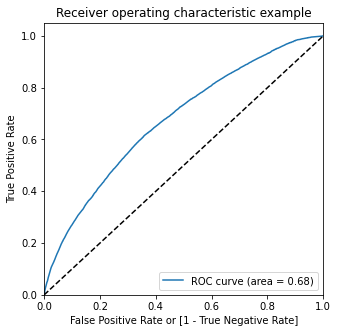

In [75]:
## Train AUC Score 0.68
draw_roc(y_train,y_train_score)

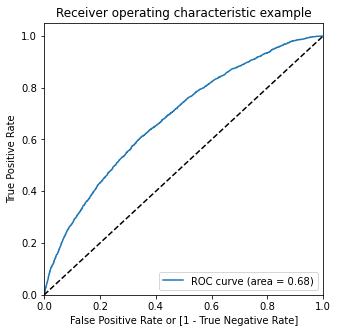

In [76]:
##AUC of Test is 0.68 as well
draw_roc(y_test,y_test_score)

In [77]:
## Thresholding to improve the model

In [78]:
result=pd.DataFrame()
result["y_train"]=y_train
result["predicted_probability_1"]=y_train_score
result

,y_train,predicted_probability_1
43958,0,0.281847
77473,0,0.119316
28123,1,0.116053
31110,0,0.151919
57322,0,0.384148
...,...,...
65615,0,0.021768
77655,0,0.197955
79683,1,0.437852
56088,0,0.252488


In [79]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    result[i]= result.predicted_probability_1.map(lambda x: 1 if x > i else 0)
result

,y_train,predicted_probability_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
43958,0,0.281847,1,1,1,0,0,0,0,0,0,0
77473,0,0.119316,1,1,0,0,0,0,0,0,0,0
28123,1,0.116053,1,1,0,0,0,0,0,0,0,0
31110,0,0.151919,1,1,0,0,0,0,0,0,0,0
57322,0,0.384148,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0,0.021768,1,0,0,0,0,0,0,0,0,0
77655,0,0.197955,1,1,0,0,0,0,0,0,0,0
79683,1,0.437852,1,1,1,1,1,0,0,0,0,0
56088,0,0.252488,1,1,1,0,0,0,0,0,0,0


In [80]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train, result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.170477  1.000000  0.000000
0.1   0.1  0.314391  0.940167  0.185787
0.2   0.2  0.706609  0.484822  0.752189
0.3   0.3  0.804935  0.229506  0.923193
0.4   0.4  0.827785  0.093049  0.978783
0.5   0.5  0.830073  0.010559  0.998493
0.6   0.6  0.829535  0.000073  1.000000
0.7   0.7  0.829523  0.000000  1.000000
0.8   0.8  0.829523  0.000000  1.000000
0.9   0.9  0.829523  0.000000  1.000000


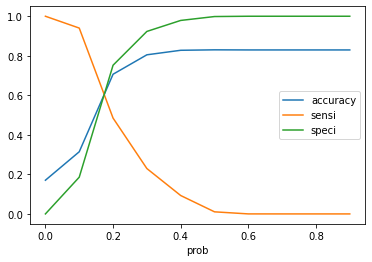

In [81]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [82]:
## for threshold of 0.18 from the above graph the sensitivity, accuracy and specificity are the best

In [83]:
## Evaluating the model now with updated thresholds
threshold=0.18
logresultdataset=pd.DataFrame()
logresultdataset["y_train"]=y_train
logresultdataset["y_train_pred_prob"]=logmodel1.predict_proba(X_train)[:,1]
logresultdataset["y_train_pred"]=logresultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [84]:
## Training Data
## Recall, precision scores are for label 1
print("Accuracy score :",accuracy_score(y_train,logresultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,logresultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,logresultdataset.y_train_pred))

Accuracy score : 0.654995687446093
Precision score : 0.2665529695024077
Recall score : 0.584469863616366


In [85]:
print(classification_report(y_train,logresultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     66361
           1       0.27      0.58      0.37     13638

    accuracy                           0.65     79999
   macro avg       0.58      0.63      0.56     79999
weighted avg       0.78      0.65      0.70     79999



In [86]:
## For test dataset
testresultdataset=pd.DataFrame()
testresultdataset["y_test_pred_prob"]=logmodel1.predict_proba(X_test)[:,1]
testresultdataset["y_test_pred"]=testresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [87]:
print("Accuracy score :",accuracy_score(y_test,testresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,testresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,testresultdataset.y_test_pred))

Accuracy score : 0.6571
Precision score : 0.26396348012889365
Recall score : 0.5882704967085578


In [88]:
confusion_matrix(y_train,y_train_pred)

array([[66261,   100],
       [13494,   144]])

## Hyper Parameter Tuning

In [89]:
LogisticRegression()

LogisticRegression()

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
param={"penalty":['l1', 'l2'],"solver":['newton-cg', 'lbfgs', 'liblinear'],
       "fit_intercept":[True,False],"C":[0.1,0.2,0.3,0.4,0.5,1,2]}

In [92]:
search=RandomizedSearchCV(estimator=LogisticRegression(),param_distributions=param,cv=5,scoring="accuracy")
search.fit(X_train,y_train)

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2],
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy')

In [93]:
search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'fit_intercept': True, 'C': 1}

In [94]:
logm=LogisticRegression(solver="newton-cg",penalty="l2",fit_intercept=False,C=1)
logm.fit(X_train,y_train)

LogisticRegression(C=1, fit_intercept=False, solver='newton-cg')

In [95]:
result=pd.DataFrame()
result["y_train"]=y_train
result["predicted_probability_1"]=logm.predict_proba(X_train)[:,1]
result

,y_train,predicted_probability_1
43958,0,0.281795
77473,0,0.119269
28123,1,0.116033
31110,0,0.152014
57322,0,0.384979
...,...,...
65615,0,0.021762
77655,0,0.197930
79683,1,0.437906
56088,0,0.252369


In [96]:
## Evaluating the model now with updated thresholds
threshold=0.18
resultdataset=pd.DataFrame()
resultdataset["y_train"]=y_train
resultdataset["y_train_pred_prob"]=logm.predict_proba(X_train)[:,1]
resultdataset["y_train_pred"]=resultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [97]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,resultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,resultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,resultdataset.y_train_pred))



Accuracy score : 0.6549831872898412
Precision score : 0.26651282565800477
Recall score : 0.5843232145475876


In [98]:
print(classification_report(y_train,resultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     66361
           1       0.27      0.58      0.37     13638

    accuracy                           0.65     79999
   macro avg       0.58      0.63      0.56     79999
weighted avg       0.78      0.65      0.70     79999



In [99]:
## For test dataset
testresultdataset=pd.DataFrame()
testresultdataset["y_test_pred_prob"]=logm.predict_proba(X_test)[:,1]
testresultdataset["y_test_pred"]=testresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [100]:
print("Accuracy score :",accuracy_score(y_test,testresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,testresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,testresultdataset.y_test_pred))

Accuracy score : 0.657
Precision score : 0.26382921589688507
Recall score : 0.5879712746858169


In [101]:
print(classification_report(y_test,testresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.77     16658
           1       0.26      0.59      0.36      3342

    accuracy                           0.66     20000
   macro avg       0.58      0.63      0.56     20000
weighted avg       0.79      0.66      0.70     20000



## Feature Selection 

In [102]:
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
rfe=RFE(logm,n_features_to_select=28)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1, fit_intercept=False, solver='newton-cg'),
    n_features_to_select=28)

In [104]:
col=X_train.columns[rfe.support_]

In [105]:
X_train_rfe=X_train[col]

In [106]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,device_type_4,6.570451
1,device_type_5,2.012784
2,banner_pos_2,1.049579
3,banner_pos_3,1.011142
4,banner_pos_4,1.000774
5,banner_pos_5,1.032654
6,banner_pos_7,1.560914
7,device_conn_type_5,1.043187
8,site_category_50e219e0,41.938295
9,site_category_f028772b,1.873635


In [107]:
X_train_rfe=X_train_rfe.drop("C1_1002",axis=1)

In [108]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,device_type_4,6.570451
1,device_type_5,2.012784
2,banner_pos_2,1.049579
3,banner_pos_3,1.011142
4,banner_pos_4,1.000774
5,banner_pos_5,1.032654
6,banner_pos_7,1.560914
7,device_conn_type_5,1.043187
8,site_category_50e219e0,41.938295
9,site_category_f028772b,1.873778


In [109]:
X_train_rfe=X_train_rfe.drop("site_id+site_domain_85f751fd-c4e18dd6",axis=1)

In [110]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,device_type_4,6.570438
1,device_type_5,2.012784
2,banner_pos_2,1.049578
3,banner_pos_3,1.011140
4,banner_pos_4,1.000774
5,banner_pos_5,1.032654
6,banner_pos_7,1.560865
7,device_conn_type_5,1.043143
8,site_category_50e219e0,7.099522
9,site_category_f028772b,1.873613


In [111]:
X_train_rfe=X_train_rfe.drop("site_category_50e219e0",axis=1)

In [112]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,device_type_4,6.570432
1,device_type_5,2.012772
2,banner_pos_2,1.049570
3,banner_pos_3,1.011140
4,banner_pos_4,1.000773
5,banner_pos_5,1.032654
6,banner_pos_7,1.560809
7,device_conn_type_5,1.043120
8,site_category_f028772b,1.719906
9,site_category_f66779e6,1.065267


In [113]:
X_train_rfe=X_train_rfe.drop("C1_other",axis=1)

In [114]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,device_type_4,1.464964
1,device_type_5,1.112738
2,banner_pos_2,1.049570
3,banner_pos_3,1.001888
4,banner_pos_4,1.000773
5,banner_pos_5,1.002543
6,banner_pos_7,1.560791
7,device_conn_type_5,1.006334
8,site_category_f028772b,1.711169
9,site_category_f66779e6,1.065050


In [115]:
X_train_rfe=X_train_rfe.drop("C15_other",axis=1)

In [116]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,device_type_4,1.464959
1,device_type_5,1.104560
2,banner_pos_2,1.049568
3,banner_pos_3,1.001888
4,banner_pos_4,1.000772
5,banner_pos_5,1.002542
6,banner_pos_7,1.138442
7,device_conn_type_5,1.006290
8,site_category_f028772b,1.710980
9,site_category_f66779e6,1.065037


In [117]:
### VIF is now below 5, we have our final model with 23 features

In [118]:
## Updating our model for the last time
X_test_rfe=X_test[X_train_rfe.columns]
X_test_rfe

,device_type_4,device_type_5,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_conn_type_5,site_category_f028772b,site_category_f66779e6,...,site_id+site_domain_e151e245-7e091613,app_id+app_domain_9c13b419-2347f47a,app_id+app_domain_e2fcccd2-5c5a694b,app_id+app_domain_other,C1_1005,C16_50,C16_250,C16_other,C18_1,C18_2
79667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
83841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
57025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
53130,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
32612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
54112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
82665,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
11767,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0


In [119]:
logm=LogisticRegression(solver="newton-cg",penalty="l2",fit_intercept=False,C=1)
logm.fit(X_train_rfe,y_train)

LogisticRegression(C=1, fit_intercept=False, solver='newton-cg')

In [120]:
threshold=0.18
resultdataset=pd.DataFrame()
resultdataset["y_train"]=y_train
resultdataset["y_train_pred_prob"]=logm.predict_proba(X_train_rfe)[:,1]
resultdataset["y_train_pred"]=resultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [121]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,resultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,resultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,resultdataset.y_train_pred))




Accuracy score : 0.7250215627695347
Precision score : 0.2922465208747515
Recall score : 0.43114826220853497


In [122]:
print(classification_report(y_train,resultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83     66361
           1       0.29      0.43      0.35     13638

    accuracy                           0.73     79999
   macro avg       0.58      0.61      0.59     79999
weighted avg       0.77      0.73      0.74     79999



In [123]:
## For test dataset
testresultdataset=pd.DataFrame()
testresultdataset["y_test_pred_prob"]=logm.predict_proba(X_test_rfe)[:,1]
testresultdataset["y_test_pred"]=testresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [124]:
print("Accuracy score :",accuracy_score(y_test,testresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,testresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,testresultdataset.y_test_pred))

Accuracy score : 0.72735
Precision score : 0.2909487027134086
Recall score : 0.4395571514063435


In [125]:
print(classification_report(y_test,testresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83     16658
           1       0.29      0.44      0.35      3342

    accuracy                           0.73     20000
   macro avg       0.58      0.61      0.59     20000
weighted avg       0.78      0.73      0.75     20000



In [126]:
### Final model achieved

### Decision Tree Model

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [129]:
y_train_pred=dtree.predict(X_train)
y_test_pred=dtree.predict(X_test)
y_train_score_dtree=dtree.predict_proba(X_train)[:,1]
y_test_score_dtree=dtree.predict_proba(X_test)[:,1]

In [130]:
## Higher accuracy,precision and recall score for training data
print("Accuracy score :",accuracy_score(y_train,y_train_pred))
print("Precision score :",precision_score(y_train,y_train_pred))
print("Recall score :",recall_score(y_train,y_train_pred))

Accuracy score : 0.8723609045113064
Precision score : 0.866837936202098
Recall score : 0.2968910397418976


In [131]:
## For test data
print("Accuracy score :",accuracy_score(y_test,y_test_pred))
print("Precision score :",precision_score(y_test,y_test_pred))
print("Recall score :",recall_score(y_test,y_test_pred))

Accuracy score : 0.80965
Precision score : 0.31962761830876646
Recall score : 0.12327947336923997


## Classification Report

In [132]:
##Train
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     66361
           1       0.87      0.30      0.44     13638

    accuracy                           0.87     79999
   macro avg       0.87      0.64      0.69     79999
weighted avg       0.87      0.87      0.85     79999



In [133]:
##Test
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16658
           1       0.32      0.12      0.18      3342

    accuracy                           0.81     20000
   macro avg       0.58      0.54      0.54     20000
weighted avg       0.76      0.81      0.77     20000



## Cross Validation

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
average_recall_score=cross_val_score(dtree,X,y,scoring="recall",cv=5)
average_precision_score=cross_val_score(dtree,X,y,scoring="precision",cv=5)
average_accuracy_score=cross_val_score(dtree,X,y,scoring="accuracy",cv=5)

In [136]:
print("Average Recall is" ,np.mean(average_recall_score))
print("Average Precision is" ,np.mean(average_precision_score))
print("Average Accuracy is", np.mean(average_accuracy_score))

Average Recall is 0.11872791519434629
Average Precision is 0.31085572100862124
Average Accuracy is 0.8051480624031202


In [137]:
## Model needs to be updated

## ROC Curve

In [138]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score =roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

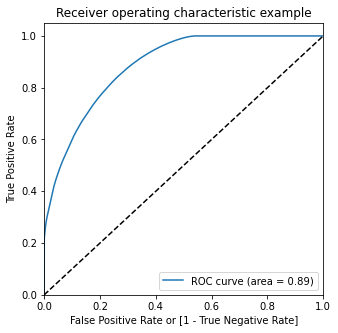

In [139]:
## Training AUC Score 0.89
draw_roc(y_train,y_train_score_dtree)

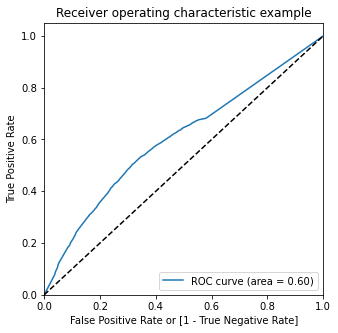

In [140]:
## Test AUC Score of 0.60
draw_roc(y_test,y_test_score_dtree)

In [141]:
## Lower scores for Test Data, thresholding to improve precision and recall

In [142]:
resultdt=pd.DataFrame()
resultdt["y_train"]=y_train
resultdt["predicted_probability_1"]=y_train_score_dtree
resultdt

,y_train,predicted_probability_1
43958,0,0.272727
77473,0,0.101449
28123,1,0.500000
31110,0,0.000000
57322,0,0.000000
...,...,...
65615,0,0.000000
77655,0,0.000000
79683,1,0.285714
56088,0,0.000000


In [143]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    resultdt[i]= resultdt.predicted_probability_1.map(lambda x: 1 if x > i else 0)
resultdt

,y_train,predicted_probability_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
43958,0,0.272727,1,1,1,0,0,0,0,0,0,0
77473,0,0.101449,1,1,0,0,0,0,0,0,0,0
28123,1,0.500000,1,1,1,1,1,0,0,0,0,0
31110,0,0.000000,0,0,0,0,0,0,0,0,0,0
57322,0,0.000000,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0,0.000000,0,0,0,0,0,0,0,0,0,0
77655,0,0.000000,0,0,0,0,0,0,0,0,0,0
79683,1,0.285714,1,1,1,0,0,0,0,0,0,0
56088,0,0.000000,0,0,0,0,0,0,0,0,0,0


In [144]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train, resultdt[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.553919  1.000000  0.462244
0.1   0.1  0.656271  0.951899  0.595515
0.2   0.2  0.790285  0.777607  0.792890
0.3   0.3  0.844873  0.619299  0.891231
0.4   0.4  0.870373  0.447793  0.957219
0.5   0.5  0.872361  0.296891  0.990627
0.6   0.6  0.871148  0.270421  0.994605
0.7   0.7  0.867886  0.231559  0.998659
0.8   0.8  0.865698  0.212568  0.999925
0.9   0.9  0.865423  0.210588  1.000000


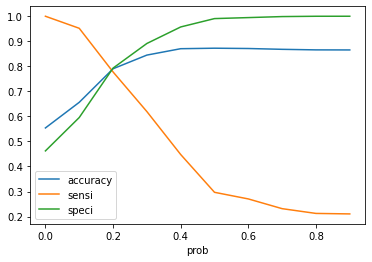

In [145]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [146]:
## Evaluating the model now with updated thresholds
threshold=0.20
dtreeresultdataset=pd.DataFrame()
dtreeresultdataset["y_train"]=y_train
dtreeresultdataset["y_train_pred_prob"]=dtree.predict_proba(X_train)[:,1]
dtreeresultdataset["y_train_pred"]=dtreeresultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [147]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,dtreeresultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,dtreeresultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,dtreeresultdataset.y_train_pred))

Accuracy score : 0.7902848785609821
Precision score : 0.4355415006776459
Recall score : 0.7776066871975363


In [148]:
print(classification_report(y_train,dtreeresultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     66361
           1       0.44      0.78      0.56     13638

    accuracy                           0.79     79999
   macro avg       0.69      0.79      0.71     79999
weighted avg       0.86      0.79      0.81     79999



In [149]:
## For test dataset
dtreetestresultdataset=pd.DataFrame()
dtreetestresultdataset["y_test_pred_prob"]=dtree.predict_proba(X_test)[:,1]
dtreetestresultdataset["y_test_pred"]=dtreetestresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [150]:
print("Accuracy score :",accuracy_score(y_test,dtreetestresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,dtreetestresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,dtreetestresultdataset.y_test_pred))

Accuracy score : 0.68375
Precision score : 0.24945405677809507
Recall score : 0.44434470377019747


In [151]:
print(classification_report(y_test,dtreetestresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79     16658
           1       0.25      0.44      0.32      3342

    accuracy                           0.68     20000
   macro avg       0.56      0.59      0.56     20000
weighted avg       0.76      0.68      0.71     20000



In [152]:
## Recall has now improved

## Hyperparameter Tuning

In [153]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [154]:
param_grid={"max_depth":range(1,10,1),
    "min_samples_split":range(2,20,2),
    "min_samples_leaf":[1,2,3,5,10],"criterion":["gini","entropy"]}

In [155]:
search=RandomizedSearchCV(random_state=100,estimator=DecisionTreeClassifier(),param_distributions=param_grid,cv=5,scoring="accuracy")

In [156]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': range(2, 20, 2)},
                   random_state=100, scoring='accuracy')

In [157]:
search.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 10,
 'max_depth': 5,
 'criterion': 'gini'}

In [158]:
decision=DecisionTreeClassifier(min_samples_split= 6,
 min_samples_leaf=10,
 max_depth= 5,
 criterion='gini')

In [159]:
decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=6)

In [160]:
resultdt=pd.DataFrame()
resultdt["y_train"]=y_train
resultdt["predicted_probability_1"]=decision.predict_proba(X_train)[:,1]
resultdt

,y_train,predicted_probability_1
43958,0,0.331068
77473,0,0.141793
28123,1,0.141793
31110,0,0.141793
57322,0,0.219659
...,...,...
65615,0,0.019744
77655,0,0.219659
79683,1,0.449343
56088,0,0.219659


In [161]:
## Evaluating the model now with updated thresholds
threshold=0.20
dtreeresultdataset=pd.DataFrame()
dtreeresultdataset["y_train"]=y_train
dtreeresultdataset["y_train_pred_prob"]=decision.predict_proba(X_train)[:,1]
dtreeresultdataset["y_train_pred"]=dtreeresultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [162]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,dtreeresultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,dtreeresultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,dtreeresultdataset.y_train_pred))

Accuracy score : 0.7418967737096713
Precision score : 0.30231246474901297
Recall score : 0.3930195043261475


In [163]:
print(classification_report(y_train,dtreeresultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     66361
           1       0.30      0.39      0.34     13638

    accuracy                           0.74     79999
   macro avg       0.58      0.60      0.59     79999
weighted avg       0.77      0.74      0.75     79999



In [164]:
## For test dataset
dtreetestresultdataset=pd.DataFrame()
dtreetestresultdataset["y_test_pred_prob"]=decision.predict_proba(X_test)[:,1]
dtreetestresultdataset["y_test_pred"]=dtreetestresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [165]:
print("Accuracy score :",accuracy_score(y_test,dtreetestresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,dtreetestresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,dtreetestresultdataset.y_test_pred))

Accuracy score : 0.74415
Precision score : 0.3012318029115342
Recall score : 0.40245362058647516


In [166]:
print(classification_report(y_test,dtreetestresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     16658
           1       0.30      0.40      0.34      3342

    accuracy                           0.74     20000
   macro avg       0.59      0.61      0.59     20000
weighted avg       0.78      0.74      0.76     20000



In [167]:
### Model is now finely tuned with both training and test datasets giving close values

## Feature Selection

In [168]:
## Using RFE to reduce our features

In [169]:
from sklearn.feature_selection import RFE

In [170]:
rfe=RFE(estimator=decision,n_features_to_select=60)
rfe.fit(X_train,y_train)

RFE(estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                     min_samples_split=6),
    n_features_to_select=60)

In [171]:
col=X_train.columns[rfe.support_]

In [172]:
X_train_rfe=X_train[col]

In [173]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,banner_pos_1,2.010595
1,banner_pos_2,1.050624
2,banner_pos_3,1.002355
3,banner_pos_4,1.001724
4,banner_pos_5,1.011705
5,banner_pos_7,1.011363
6,device_conn_type_2,1.124235
7,device_conn_type_3,1.588667
8,device_conn_type_5,1.012783
9,site_category_3e814130,1.994962


In [174]:
X_train_rfe=X_train_rfe.drop("dayofweek_2",axis=1)

In [175]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,banner_pos_1,2.010595
1,banner_pos_2,1.050624
2,banner_pos_3,1.002355
3,banner_pos_4,1.001724
4,banner_pos_5,1.011705
5,banner_pos_7,1.011363
6,device_conn_type_2,1.124235
7,device_conn_type_3,1.588667
8,device_conn_type_5,1.012783
9,site_category_3e814130,1.994962


In [176]:
X_train_rfe=X_train_rfe.drop("site_category_50e219e0",axis=1)

In [177]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,banner_pos_1,2.010334
1,banner_pos_2,1.050617
2,banner_pos_3,1.002203
3,banner_pos_4,1.001724
4,banner_pos_5,1.007737
5,banner_pos_7,1.011363
6,device_conn_type_2,1.118699
7,device_conn_type_3,1.585373
8,device_conn_type_5,1.011923
9,site_category_3e814130,1.977647


In [178]:
X_train_rfe=X_train_rfe.drop("app_category_0f2161f8",axis=1)

In [179]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,banner_pos_1,2.007678
1,banner_pos_2,1.050615
2,banner_pos_3,1.001970
3,banner_pos_4,1.001723
4,banner_pos_5,1.001195
5,banner_pos_7,1.011187
6,device_conn_type_2,1.118005
7,device_conn_type_3,1.583738
8,device_conn_type_5,1.011143
9,site_category_3e814130,1.969112


In [180]:
## ALl VIF are under 5, we have reduced our features to 57 columns

In [181]:
X_test_rfe=X_test[X_train_rfe.columns]
X_test_rfe

,banner_pos_1,banner_pos_2,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_conn_type_2,device_conn_type_3,device_conn_type_5,site_category_3e814130,...,site_id+site_domain_d9750ee7-98572c79,site_id+site_domain_e151e245-7e091613,app_id+app_domain_9c13b419-2347f47a,app_id+app_domain_e2fcccd2-5c5a694b,app_id+app_domain_ecad2386-7801e8d9,C1_1002,C16_250,C18_0,C18_1,C18_2
79667,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
83841,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
57025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
32612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
54112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
82665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11767,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [182]:
## Updating our model
decision=DecisionTreeClassifier(min_samples_split= 6,
 min_samples_leaf=10,
 max_depth= 5,
 criterion='gini')
decision.fit(X_train_rfe,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=6)

In [183]:
threshold=0.20
rfresultdataset=pd.DataFrame()
rfresultdataset["y_train"]=y_train
rfresultdataset["y_train_pred_prob"]=decision.predict_proba(X_train_rfe)[:,1]
rfresultdataset["y_train_pred"]=rfresultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)


In [184]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,rfresultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,rfresultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,rfresultdataset.y_train_pred))


Accuracy score : 0.7418967737096713
Precision score : 0.30231246474901297
Recall score : 0.3930195043261475


In [185]:
print(classification_report(y_train,rfresultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     66361
           1       0.30      0.39      0.34     13638

    accuracy                           0.74     79999
   macro avg       0.58      0.60      0.59     79999
weighted avg       0.77      0.74      0.75     79999



In [186]:
## For test dataset
rftestresultdataset=pd.DataFrame()
rftestresultdataset["y_test_pred_prob"]=decision.predict_proba(X_test_rfe)[:,1]
rftestresultdataset["y_test_pred"]=rftestresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [187]:
print("Accuracy score :",accuracy_score(y_test,rftestresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,rftestresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,rftestresultdataset.y_test_pred))

Accuracy score : 0.74415
Precision score : 0.3012318029115342
Recall score : 0.40245362058647516


In [188]:
print(classification_report(y_test,rftestresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     16658
           1       0.30      0.40      0.34      3342

    accuracy                           0.74     20000
   macro avg       0.59      0.61      0.59     20000
weighted avg       0.78      0.74      0.76     20000



In [189]:
## Final Model Achieved with very close test and train results

## Random Forest Model

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [191]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [192]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
y_train_score=rf.predict_proba(X_train)[:,1]
y_test_score=rf.predict_proba(X_test)[:,1]



In [193]:
## Higher accuracy,precision and recall score for training data
print("Accuracy score :",accuracy_score(y_train,y_train_pred))
print("Precision score :",precision_score(y_train,y_train_pred))
print("Recall score :",recall_score(y_train,y_train_pred))

Accuracy score : 0.8723609045113064
Precision score : 0.8080172568757864
Recall score : 0.3295937820794838


In [194]:
## For test data
print("Accuracy score :",accuracy_score(y_test,y_test_pred))
print("Precision score :",precision_score(y_test,y_test_pred))
print("Recall score :",recall_score(y_test,y_test_pred))

Accuracy score : 0.81475
Precision score : 0.344206008583691
Recall score : 0.11998803111909037


In [195]:
## Classification Report for Training data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     66361
           1       0.81      0.33      0.47     13638

    accuracy                           0.87     79999
   macro avg       0.84      0.66      0.70     79999
weighted avg       0.87      0.87      0.85     79999



In [196]:
## Classification Report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90     16658
           1       0.34      0.12      0.18      3342

    accuracy                           0.81     20000
   macro avg       0.59      0.54      0.54     20000
weighted avg       0.76      0.81      0.78     20000



# There is a huge drop in recall and precision scores for test data, possibly due to overfitting

In [197]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score =roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

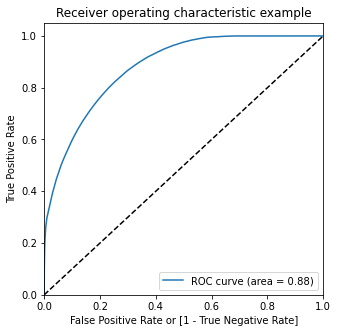

In [198]:
## Train AUC score of 0.88
draw_roc(y_train,y_train_score)

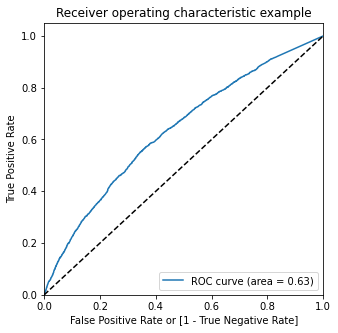

In [199]:
## Test AUC Score of 0.63
draw_roc(y_test,y_test_score)

## Cross Validation

In [200]:
from sklearn.model_selection import cross_val_score

In [201]:
average_recall_score=cross_val_score(rf,X,y,scoring="recall",cv=5)
average_precision_score=cross_val_score(rf,X,y,scoring="precision",cv=5)
average_accuracy_score=cross_val_score(rf,X,y,scoring="accuracy",cv=5)

In [202]:
print("Average Recall is" ,np.mean(average_recall_score))
print("Average Precision is" ,np.mean(average_precision_score))
print("Average Accuracy is", np.mean(average_accuracy_score))

Average Recall is 0.1182567726737338
Average Precision is 0.33239358065527547
Average Accuracy is 0.8099381004050201


In [203]:
## Model needs to be updated

## Findind a probability threshold by thresholding

In [204]:
resultrf=pd.DataFrame()
resultrf["y_train"]=y_train
resultrf["predicted_probability_1"]=rf.predict_proba(X_train)[:,1]
resultrf

,y_train,predicted_probability_1
43958,0,0.279205
77473,0,0.097621
28123,1,0.511333
31110,0,0.030833
57322,0,0.158250
...,...,...
65615,0,0.000000
77655,0,0.055667
79683,1,0.283585
56088,0,0.000000


In [205]:
## Finding predictions for various thresholds
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    resultrf[i]= resultrf.predicted_probability_1.map(lambda x: 1 if x > i else 0)
resultrf

,y_train,predicted_probability_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
43958,0,0.279205,1,1,1,0,0,0,0,0,0,0
77473,0,0.097621,1,0,0,0,0,0,0,0,0,0
28123,1,0.511333,1,1,1,1,1,1,0,0,0,0
31110,0,0.030833,1,0,0,0,0,0,0,0,0,0
57322,0,0.158250,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65615,0,0.000000,0,0,0,0,0,0,0,0,0,0
77655,0,0.055667,1,0,0,0,0,0,0,0,0,0
79683,1,0.283585,1,1,1,0,0,0,0,0,0,0
56088,0,0.000000,0,0,0,0,0,0,0,0,0,0


In [206]:
##Finding cutoff for specificity, sensitivity and accuracy
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train, resultrf[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.338729  1.000000  0.202830
0.1   0.1  0.626995  0.954245  0.559741
0.2   0.2  0.777047  0.794178  0.773527
0.3   0.3  0.843973  0.617979  0.890418
0.4   0.4  0.868861  0.458498  0.953195
0.5   0.5  0.872361  0.329594  0.983906
0.6   0.6  0.870223  0.268368  0.993912
0.7   0.7  0.856461  0.165200  0.998523
0.8   0.8  0.842623  0.077944  0.999774
0.9   0.9  0.835223  0.033436  1.000000


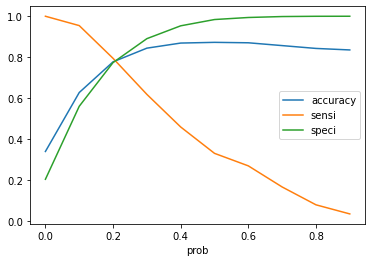

In [207]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [208]:
## threshold here is 0.21

In [209]:
## Evaluating the model now with updated thresholds
threshold=0.21
rfresultdataset=pd.DataFrame()
rfresultdataset["y_train"]=y_train
rfresultdataset["y_train_pred_prob"]=rf.predict_proba(X_train)[:,1]
rfresultdataset["y_train_pred"]=rfresultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [210]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,rfresultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,rfresultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,rfresultdataset.y_train_pred))

Accuracy score : 0.7886098576232203
Precision score : 0.4327456540500555
Recall score : 0.7721073471183458


In [211]:
## Training Data
print(classification_report(y_train,rfresultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     66361
           1       0.43      0.77      0.55     13638

    accuracy                           0.79     79999
   macro avg       0.69      0.78      0.71     79999
weighted avg       0.86      0.79      0.81     79999



In [212]:
## For test dataset
rftestresultdataset=pd.DataFrame()
rftestresultdataset["y_test_pred_prob"]=rf.predict_proba(X_test)[:,1]
rftestresultdataset["y_test_pred"]=rftestresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [213]:
print("Accuracy score :",accuracy_score(y_test,rftestresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,rftestresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,rftestresultdataset.y_test_pred))

Accuracy score : 0.6804
Precision score : 0.25227420402859
Recall score : 0.4646918013165769


In [214]:
print(classification_report(y_test,rftestresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79     16658
           1       0.25      0.46      0.33      3342

    accuracy                           0.68     20000
   macro avg       0.56      0.59      0.56     20000
weighted avg       0.77      0.68      0.71     20000



In [215]:
### We can see that the thresholding has improved our recall and precision for our test data

## Hyperparameter tuning

In [216]:
RandomForestClassifier()

RandomForestClassifier()

In [217]:
param_grid={"max_depth":range(1,10,1),
    "min_samples_split":range(2,20,2),
    "min_samples_leaf":[1,2,3,5,10],"criterion":["gini","entropy"]}

In [218]:
search=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,cv=5,scoring="accuracy",n_jobs=-1)

In [219]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': range(2, 20, 2)},
                   scoring='accuracy')

In [220]:
search.best_params_
###Forgot to add a random_state, but the parameters I got were 
###'min_samples_split': 18,
###'min_samples_leaf': 5,
###'max_depth': 9,
###'criterion': 'entropy'


{'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 7,
 'criterion': 'entropy'}

In [221]:
random=RandomForestClassifier(min_samples_split= 2,
 min_samples_leaf= 10,
 max_depth= 9,
 criterion= 'gini')

In [222]:
random.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=10)

In [223]:
## Getting precision and recall again with the updated model

In [224]:
threshold=0.21
rfresultdataset=pd.DataFrame()
rfresultdataset["y_train"]=y_train
rfresultdataset["y_train_pred_prob"]=random.predict_proba(X_train)[:,1]
rfresultdataset["y_train_pred"]=rfresultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [225]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,rfresultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,rfresultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,rfresultdataset.y_train_pred))

Accuracy score : 0.7565344566807085
Precision score : 0.3212733394551576
Recall score : 0.3848071564745564


In [226]:

print(classification_report(y_train,rfresultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     66361
           1       0.32      0.38      0.35     13638

    accuracy                           0.76     79999
   macro avg       0.59      0.61      0.60     79999
weighted avg       0.77      0.76      0.76     79999



In [227]:
accuracy_score(y_train,rfresultdataset.y_train_pred)

0.7565344566807085

In [228]:
## For test dataset
rftestresultdataset=pd.DataFrame()
rftestresultdataset["y_test_pred_prob"]=random.predict_proba(X_test)[:,1]
rftestresultdataset["y_test_pred"]=rftestresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [229]:
print("Accuracy score :",accuracy_score(y_test,rftestresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,rftestresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,rftestresultdataset.y_test_pred))

Accuracy score : 0.76165
Precision score : 0.3235949492448626
Recall score : 0.391083183722322


In [230]:

print(classification_report(y_test,rftestresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     16658
           1       0.32      0.39      0.35      3342

    accuracy                           0.76     20000
   macro avg       0.60      0.61      0.60     20000
weighted avg       0.78      0.76      0.77     20000



In [231]:
## As we can see the test scores are quite similar to the train scores now. Our model is perfectly tuned

### Feature Engineering

In [232]:
## Using RFE to reduce the no. of features

In [233]:
# Try to reduce the features to 50 first
from sklearn.feature_selection import RFE

In [234]:
rfe=RFE(random,n_features_to_select=50)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=9, min_samples_leaf=10),
    n_features_to_select=50)

In [235]:
column=X_train.columns[rfe.support_]

In [236]:
X_train_rfe=X_train[column]

In [237]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,device_type_1,24.250295
1,banner_pos_1,2.470478
2,device_conn_type_2,1.147115
3,device_conn_type_3,2.396750
4,site_category_3e814130,3.847177
5,site_category_50e219e0,54.557521
6,site_category_f028772b,8.993686
7,site_category_other,1.494034
8,app_category_0f2161f8,5.628489
9,app_category_cef3e649,1.947885


In [238]:
X_train_rfe=X_train_rfe.drop("dayofweek_3",axis=1)

In [239]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,device_type_1,24.250295
1,banner_pos_1,2.470478
2,device_conn_type_2,1.147115
3,device_conn_type_3,2.396750
4,site_category_3e814130,3.847177
5,site_category_50e219e0,54.557521
6,site_category_f028772b,8.993686
7,site_category_other,1.494034
8,app_category_0f2161f8,5.628489
9,app_category_cef3e649,1.947885


In [240]:
##Since there are a lot of features with very high vif, we can select fewer features
rfe=RFE(random,n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=9, min_samples_leaf=10),
    n_features_to_select=20)

In [241]:
column=X_train.columns[rfe.support_]

In [242]:
X_train_rfe=X_train[column]

In [243]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,site_category_3e814130,2.860656
1,site_category_50e219e0,47.505978
2,site_category_f028772b,4.724998
3,site_category_other,1.272199
4,app_category_0f2161f8,3.085896
5,device_model_other,1.070977
6,site_id+site_domain_5b08c53b-7687a86e,2.784139
7,site_id+site_domain_85f751fd-c4e18dd6,0.540103
8,site_id+site_domain_e151e245-7e091613,2.311339
9,site_id+site_domain_other,5.191642


In [244]:
X_train_rfe=X_train_rfe.drop("site_category_50e219e0",axis=1)

In [245]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,site_category_3e814130,2.703034
1,site_category_f028772b,4.302969
2,site_category_other,1.241049
3,app_category_0f2161f8,2.992319
4,device_model_other,1.070488
5,site_id+site_domain_5b08c53b-7687a86e,2.731018
6,site_id+site_domain_85f751fd-c4e18dd6,0.244976
7,site_id+site_domain_e151e245-7e091613,2.229926
8,site_id+site_domain_other,4.764271
9,app_id+app_domain_9c13b419-2347f47a,1.599355


In [246]:
X_train_rfe=X_train_rfe.drop("C15_300",axis=1)

In [247]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,site_category_3e814130,2.703020
1,site_category_f028772b,4.302967
2,site_category_other,1.241028
3,app_category_0f2161f8,2.970315
4,device_model_other,1.070268
5,site_id+site_domain_5b08c53b-7687a86e,2.730978
6,site_id+site_domain_85f751fd-c4e18dd6,0.219811
7,site_id+site_domain_e151e245-7e091613,2.229332
8,site_id+site_domain_other,4.764182
9,app_id+app_domain_9c13b419-2347f47a,1.597559


In [248]:
X_train_rfe=X_train_rfe.drop("C16_50",axis=1)

In [249]:
vif=pd.DataFrame()
vif["Features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif

,Features,VIF
0,site_category_3e814130,2.702957
1,site_category_f028772b,4.302961
2,site_category_other,1.241002
3,app_category_0f2161f8,2.970016
4,device_model_other,1.069530
5,site_id+site_domain_5b08c53b-7687a86e,2.730970
6,site_id+site_domain_85f751fd-c4e18dd6,0.154334
7,site_id+site_domain_e151e245-7e091613,2.227598
8,site_id+site_domain_other,4.763917
9,app_id+app_domain_9c13b419-2347f47a,1.597529


In [250]:
#All vif are below 5 now, so this is the final no. of features in our simplified model. Checking the parameters now
X_test_rfe=X_test[X_train_rfe.columns]
X_test_rfe

,site_category_3e814130,site_category_f028772b,site_category_other,app_category_0f2161f8,device_model_other,site_id+site_domain_5b08c53b-7687a86e,site_id+site_domain_85f751fd-c4e18dd6,site_id+site_domain_e151e245-7e091613,site_id+site_domain_other,app_id+app_domain_9c13b419-2347f47a,app_id+app_domain_ecad2386-7801e8d9,app_id+app_domain_other,C1_1002,C15_320,C16_250,C18_1,C18_2
79667,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
83841,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1
57025,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1
53130,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
32612,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
54112,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
82665,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
11767,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [251]:
## Updating our model
random=RandomForestClassifier(min_samples_split= 2,
 min_samples_leaf= 10,
 max_depth= 9,
 criterion= 'gini')

In [252]:
random.fit(X_train_rfe,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=10)

In [253]:
threshold=0.21
rfresultdataset=pd.DataFrame()
rfresultdataset["y_train"]=y_train
rfresultdataset["y_train_pred_prob"]=random.predict_proba(X_train_rfe)[:,1]
rfresultdataset["y_train_pred"]=rfresultdataset["y_train_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [254]:
## Training Data
print("Accuracy score :",accuracy_score(y_train,rfresultdataset.y_train_pred))
print("Precision score :",precision_score(y_train,rfresultdataset.y_train_pred))
print("Recall score :",recall_score(y_train,rfresultdataset.y_train_pred))

Accuracy score : 0.7523969049613121
Precision score : 0.3157328873491817
Recall score : 0.38759348878134625


In [255]:
print(classification_report(y_train,rfresultdataset.y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     66361
           1       0.32      0.39      0.35     13638

    accuracy                           0.75     79999
   macro avg       0.59      0.61      0.60     79999
weighted avg       0.77      0.75      0.76     79999



In [256]:
## For test dataset
rftestresultdataset=pd.DataFrame()
rftestresultdataset["y_test_pred_prob"]=random.predict_proba(X_test_rfe)[:,1]
rftestresultdataset["y_test_pred"]=rftestresultdataset["y_test_pred_prob"].map(lambda x:1 if x>threshold else 0)

In [257]:
print("Accuracy score :",accuracy_score(y_test,rftestresultdataset.y_test_pred))
print("Precision score :",precision_score(y_test,rftestresultdataset.y_test_pred))
print("Recall score :",recall_score(y_test,rftestresultdataset.y_test_pred))

Accuracy score : 0.755
Precision score : 0.3137254901960784
Recall score : 0.39257929383602636


In [258]:
print(classification_report(y_test,rftestresultdataset.y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     16658
           1       0.31      0.39      0.35      3342

    accuracy                           0.76     20000
   macro avg       0.59      0.61      0.60     20000
weighted avg       0.78      0.76      0.77     20000



In [259]:
## Very similar results obtained with just 17 columns as opposed to original 88, and test data is now very simialr to training data